# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

## Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

In original data we have 879 rows and 9 columns.
According to the data set description I converted Sales values into numeric.
Then I removed unneeded pet types. This was 46 rows, leaving 833 rows in final data. <br>
Looking at the remaining columns:
<ul>
    <li>There were 11 product categories, as expected</li>
    <li>Character values in Sales column have been converted to numeric values</li>
    <li>There were numeric values in Price column, as expected</li>
    <li>There are 5 pet size categories, as expected</li>
    <li>There are 4 pet type categories, as expected</li>
    <li>There were values from 1 to 10 in Rating, as expected</li>
    <li>There are 2 purchased more than once options - 1/0, as expected</li>
</ul>    

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
pet_sales = pd.read_csv('pet_sales.csv')

pet_sales.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


In [59]:
pet_sales.shape

(879, 9)

In [60]:
pet_sales.dtypes

product_id            int64
product_category     object
sales                object
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

In [61]:
pet_sales.product_id.nunique()

879

Check that there are 11 categories in the 'Product Category' column

In [62]:
pet_sales.product_category.unique() 

array(['Equipment', 'Toys', 'Snack', 'Supplements', 'Bedding', 'Medicine',
       'Housing', 'Food', 'Clothes', 'Accessory', 'Grooming'],
      dtype=object)

We need to convert column 'Sales' into numeric type. 

In [63]:
pet_sales.sales = pet_sales.sales.str.lstrip('$').str.replace(',', '')

pet_sales.sales = pd.to_numeric(pet_sales.sales)

pet_sales

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
2,4237,Toys,218000,106.34,VC_802,small,hamster,6,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0
...,...,...,...,...,...,...,...,...,...
874,4999,Snack,27000,146.93,VC_1564,medium,bird,6,0
875,4243,Snack,76000,174.07,VC_808,medium,hamster,8,0
876,4783,Snack,162000,224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,34000,199.15,VC_1229,large,dog,10,1


Remove the extra '$' sign and the comma. And convert 'Sales' into numeric.

In [64]:
pet_sales.dtypes['sales']

dtype('int64')

Check if 'Price' column is numeric

In [65]:
pet_sales.dtypes['price']

dtype('float64')

Check if all values start with same pattern in 'Vendor ID'column.

In [66]:
pet_sales.loc[pet_sales.vendor_id.str.startswith('VC_')].shape[0]

879

Check if there 5 pet size categories in 'Pet Size' column.

In [67]:
pet_sales.pet_size.unique()

array(['small', 'large', 'extra_small', 'medium', 'extra_large'],
      dtype=object)

In the 'Pet Type' column should be 4 categories ("cat","dog", "fish", "bird"), let's see if this is true.

In [68]:
pet_sales.pet_type.unique()

array(['fish', 'cat', 'hamster', 'dog', 'bird', 'rabbit'], dtype=object)

Instead of the 4 categories we need, we have 6. Let's update our data by excluding unnecessary categories.

In [69]:
pet_types = ['cat', 'dog', 'fish', 'bird']

pet_sales = pet_sales[pet_sales.pet_type.isin(pet_types)]

pet_sales.pet_type.unique()

array(['fish', 'cat', 'dog', 'bird'], dtype=object)

Check whether the Rating corresponds to a 10-point scale

In [70]:
pet_sales.rating.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Check if there 2 options in Rebuy

In [71]:
pet_sales.re_buy.unique()

array([1, 0])

## Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of single variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief





How many products are being purchased more than once?

There are 390 products that are purchased more than once, which is 53 fewer products purchased once.

In [72]:
pet_sales.re_buy.value_counts()

0    443
1    390
Name: re_buy, dtype: int64

Text(0.5, 0.98, 'The number of products by rebuy')

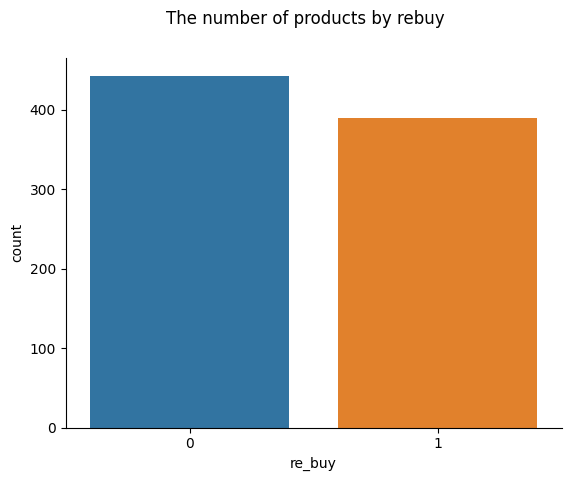

In [73]:
sns.countplot(data=pet_sales,
              x = 're_buy')
sns.despine()
plt.suptitle('The number of products by rebuy')

Do the products being purchased again have better sales than others?

As the marketing team believes that the sales volume products that are purchased more than once will be important, we should look at the range of sales volume. Products purchased once have the interquartile range of the sales volume slightly higher than products purchased more than once, however, products purchased again have a median greater than products purchased once. But the overall sales picture is the same for both types. This would suggest that the marketing team does not need to focus on including only re-purchased products in the list.

Text(0.5, 0.98, 'Range of sales volume by rebuy')

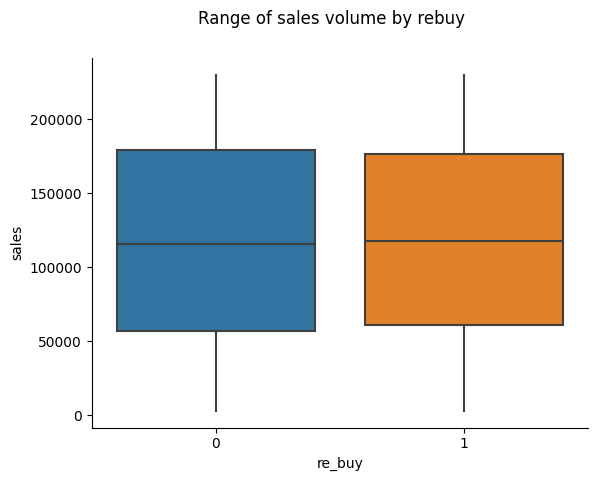

In [74]:
sns.boxplot(data = pet_sales,
            x = 're_buy',
            y = 'sales',
            showcaps=False)
sns.despine()
plt.suptitle('Range of sales volume by rebuy')

Text(0.5, 0.98, 'Range of sales volume by rebuy')

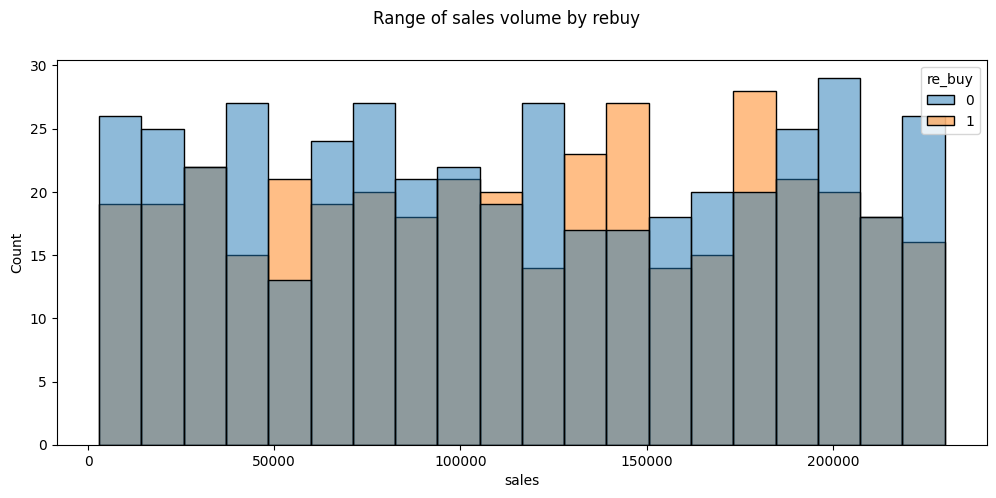

In [75]:
plt.figure(figsize=(12, 5))
sns.histplot(data = pet_sales, x = 'sales', hue='re_buy', bins=20)
plt.suptitle('Range of sales volume by rebuy')

What products are more likely to be purchased again for different types of pets?

Finally, we want to see how the type of pets and the category of products impacts the number of products purchased. The products that were most often purchased again were equipment, snacks and toys. Equipment was most often purchased for dogs and cats, snacks for fish. Toys, snacks and equipment were equally re-purchased for birds.

In [76]:
more_likely_purchased_again =  pet_sales[pet_sales['re_buy'] == 1] \
                                     .groupby(['pet_type'], as_index=False)['product_category'] \
                                     .value_counts() \
                                     .sort_values('count', ascending=False)
more_likely_purchased_again.head()

,pet_type,product_category,count
21,dog,Equipment,28
10,cat,Equipment,27
22,dog,Snack,25
11,cat,Toys,25
23,dog,Medicine,20


Text(0.5, 0.98, 'Number of products purchased more than once by pets type')

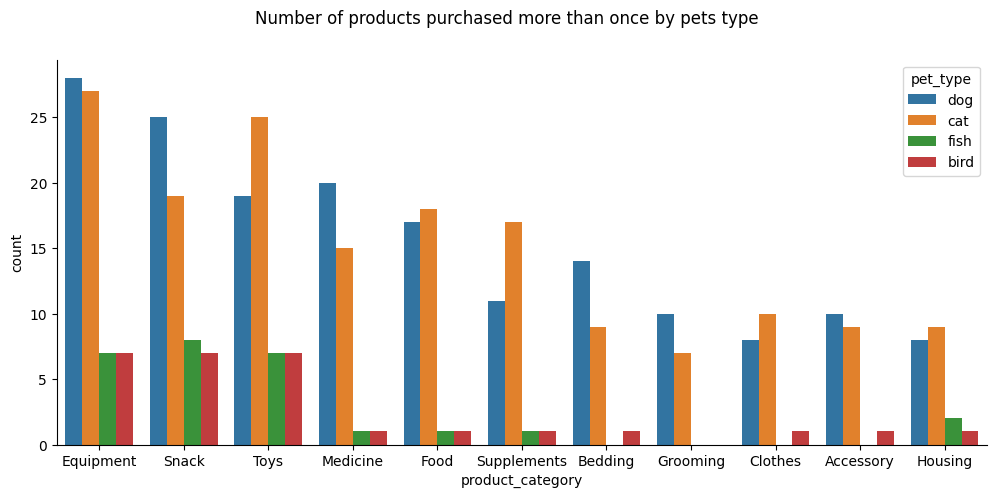

In [77]:
plt.figure(figsize=(12, 5))

sns.barplot(data = more_likely_purchased_again,
            x = 'product_category',
            y = 'count',
            hue = 'pet_type')

sns.despine()
plt.suptitle('Number of products purchased more than once by pets type')

Based on all of the above, we would recommend paying attention not only to products purchased again, but also to products purchased once. Also, equipment, snacks and toys should be included in the list of popular products, these products are among the most popular for all kinds of products. Products for dogs and cats are the main.